In [1]:
import numpy as np
from empiricaldist import Pmf

6.1. Odds

In [2]:
def odds(p):
    return p / (1-p)

In [3]:
odds(0.75)

3.0

In [4]:
odds(0.1)

0.11111111111111112

In [5]:
odds(0.9)

9.000000000000002

In [6]:
def prob(o):
    return o / (o+1)

In [7]:
prob(3/2)

0.6

In [8]:
def prob2(yes, no):
    return yes / (yes + no)

In [9]:
prob2(3, 2)

0.6

6.2. Bayes’s Rule

`P(H|D) = P(H) * P(D|H) / P(D)`

using odds:

`odds(A|D) = odds(A) * P(D|A) / P(D|B)` -> Bayes Rule



    Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?


In [10]:
prior_odds = 1 #prior probability is 50%, therefore odds of 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds

1.5

In [11]:
post_prob = prob(post_odds)
post_prob

0.6

6.3. Oliver’s Blood



    Two people have left traces of their own blood at the scene of a crime. A suspect, Oliver, is tested and found to have type ‘O’ blood. The blood groups of the two traces are found to be of type ‘O’ (a common type in the local population, having frequency 60%) and of type ‘AB’ (a rare type, with frequency 1%). Do these data [the traces found at the scene] give evidence in favor of the proposition that Oliver was one of the people [who left blood at the scene]?


In [ ]:
# focus on the bayes factor which is P(D|A) / P(D|B)

# P(D|A) -> Probability of the data assuming Oliver is guilty
# P(D|B) -> Probability of the data assuming Oliver is not guilty

# P(D|A) -> 1% because thats the likelihood of finding another person in the population with AB
# P(D|B) -> 2 options, person 1 has type O and person 2 has type AB, or the other way -> 0.6 * 0.01 * 2 -> 1.2%

# Bayes factor is 1% / 1.2% -> less than 1. This means the data under A is less likely compared to the data under B

Exercise: Suppose that based on other evidence, you prior belief in Oliver’s guilt is 90%. How much would the blood evidence in this section change your beliefs? What if you initially thought there was only a 10% chance of his guilt?

In [12]:
like1 = 0.01
like2 = 0.6 * 0.01 * 2
post_odds = odds(0.9) * like1 / like2
prob(post_odds)

0.8823529411764706

In [13]:
like1 = 0.01
like2 = 0.6 * 0.01 * 2
post_odds = odds(0.1) * like1 / like2
prob(post_odds)

0.0847457627118644

6.4. Addends

In [14]:
# skipping its mostly just showing that adding probabilities adds in an expected way
# two dice become 2-12 with the probabilities being summed -> enumerate all pairs of options and sum probability

6.5. Gluten Sensitivity

Out of 35 subjects, 12 correctly identified the gluten flour based on resumption of symptoms while they were eating it. Another 17 wrongly identified the gluten-free flour based on their symptoms, and 6 were unable to distinguish.

We can use Bayes’s Theorem to answer this question, but first we have to make some modeling decisions. I’ll assume:

    People who are sensitive to gluten have a 95% chance of correctly identifying gluten flour under the challenge conditions, and

    People who are not sensitive have a 40% chance of identifying the gluten flour by chance (and a 60% chance of either choosing the other flour or failing to distinguish).

These particular values are arbitrary, but the results are not sensitive to these choices.

In [27]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

In [28]:
from utils import make_binomial

In [29]:
dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.4) #i believe 0.4 is coming from assuming a little less than random chance -> 40% chance of guessing it correctly

<Axes: >

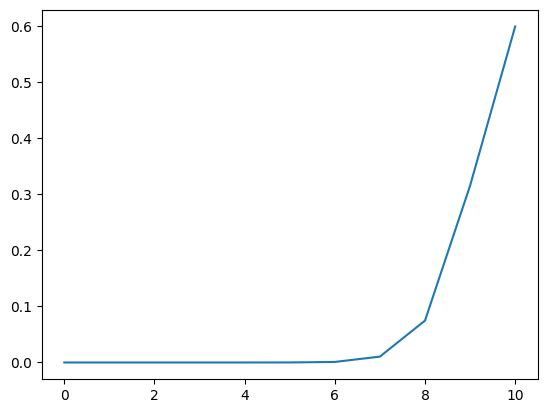

In [30]:
dist_sensitive.plot(label='sensitive')

In [31]:
dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

In [32]:
from utils import decorate

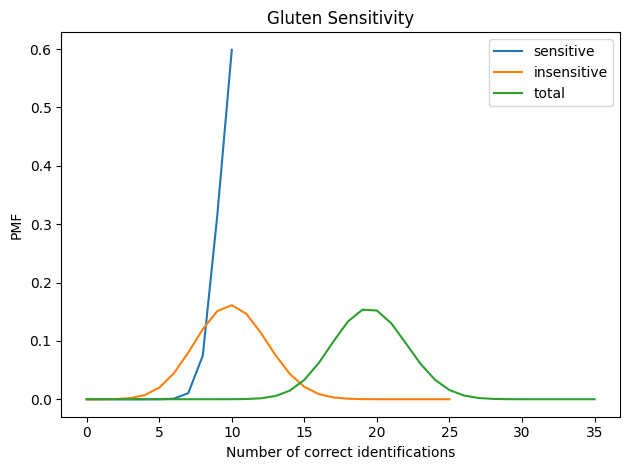

In [33]:
dist_sensitive.plot(label='sensitive')
dist_insensitive.plot(label='insensitive')
dist_total.plot(label='total')

decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten Sensitivity')

We expect most of the sensitive subjects to identify the gluten flour correctly. Of the 25 insensitive subjects, we expect about 10 to identify the gluten flour by chance. So we expect about 20 correct identifications in total.

This is the answer to the forward problem: given the number of sensitive subjects, we can compute the distribution of the data.

6.7. The Inverse Problem

In [34]:
import pandas as pd

In [35]:
table = pd.DataFrame()

for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)

    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)
    table[num_sensitive] = dist_total

In [37]:
table.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,1.719071e-08,1.432559e-09,1.193799e-10,9.948326e-12,8.290272e-13,6.908560e-14,5.757133e-15,4.797611e-16,3.998009e-17,3.331674e-18,2.776395e-19,2.313663e-20,1.928052e-21,1.606710e-22,1.338925e-23,1.115771e-24,9.298092e-26,7.748410e-27,6.457008e-28,5.380840e-29,4.484033e-30,3.736695e-31,3.113912e-32,2.594927e-33,2.162439e-34,1.802032e-35,1.501694e-36,1.251411e-37,1.042843e-38,8.690357e-40,7.241964e-41,6.034970e-42,5.029142e-43,4.190952e-44,3.492460e-45,2.910383e-46
1,4.011165e-07,5.968996e-08,7.162795e-09,7.792856e-10,8.013930e-11,7.944844e-12,7.676178e-13,7.276377e-14,6.796616e-15,6.274653e-16,5.737884e-17,5.205741e-18,4.691594e-19,4.204225e-20,3.748991e-21,3.328717e-22,2.944396e-23,2.595717e-24,2.281476e-25,1.999879e-26,1.748773e-27,1.525817e-28,1.328603e-29,1.154742e-30,1.001930e-31,8.679790e-33,7.508469e-34,6.486483e-35,5.596590e-36,4.823148e-37,4.152060e-38,3.570691e-39,3.067777e-40,2.633315e-41,2.258457e-42,1.935405e-43
2,4.545987e-06,9.741401e-07,1.709122e-07,2.506426e-08,3.269131e-09,3.940182e-10,4.490244e-11,4.908756e-12,5.197412e-13,5.365476e-14,5.426465e-15,5.395847e-16,5.289504e-17,5.122728e-18,4.909616e-19,4.662745e-20,4.393038e-21,4.109757e-22,3.820576e-23,3.531714e-24,3.248084e-25,2.973454e-26,2.710609e-27,2.461504e-28,2.227408e-29,2.009026e-30,1.806613e-31,1.620070e-32,1.449030e-33,1.292922e-34,1.151034e-35,1.022555e-36,9.066202e-38,8.023344e-39,7.088005e-40,6.251357e-41


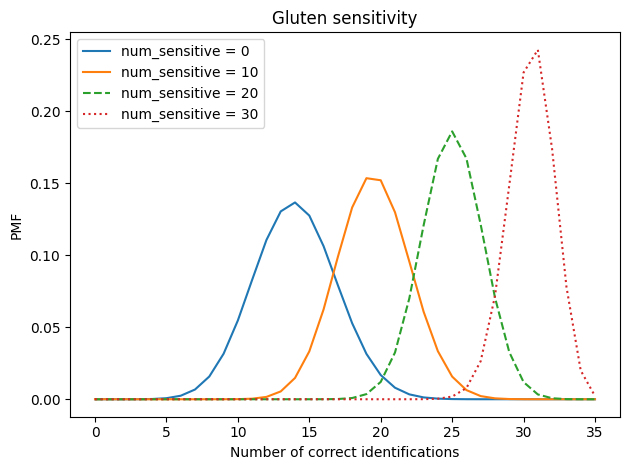

In [ ]:
# correspond to columns
table[0].plot(label='num_sensitive = 0')
table[10].plot(label='num_sensitive = 10')
table[20].plot(label='num_sensitive = 20', ls='--')
table[30].plot(label='num_sensitive = 30', ls=':')
    
decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

In [41]:
likelihood1 = table.loc[12] # the problem statement says 12 correctly identified

In [42]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

In [43]:
posterior1 = prior * likelihood1
posterior1.normalize()

np.float64(0.4754741648615131)

In [44]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

np.float64(1.7818649765887378)

<Axes: >

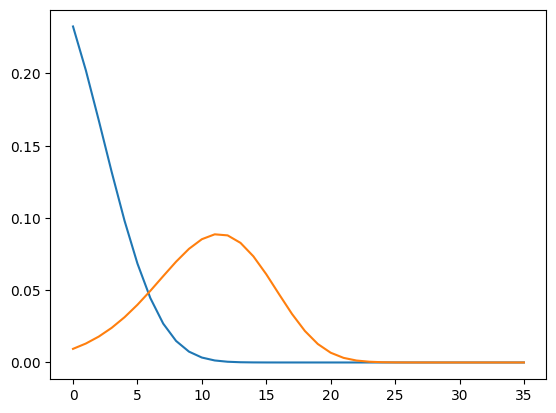

In [45]:
posterior1.plot(label='12 correct guesses')
posterior2.plot(label='20 correct guesses')

In [47]:
print(posterior1.max_prob(), posterior2.max_prob())

0 11


In [ ]:
# this means 12 correct guesses isnt a good indication that anyone can correctly deduce
# 20 correct guesses however would mean around 11 people can